<a href="https://colab.research.google.com/github/Suriyaraaj/Bank-Marketing-Optimization/blob/main/BankMarketing_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [ ]:
df = pd.read_csv('/content/bank.csv')

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.shape

(11162, 17)

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


# **Exploratory Data Analysis (EDA)**

<ipython-input-57-30573ab51c75>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan', data=df, palette='Set2')


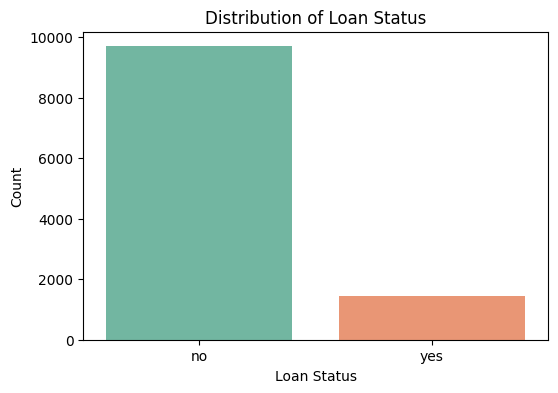

In [ ]:
# Count plot for 'loan' column
plt.figure(figsize=(6, 4))
sns.countplot(x='loan', data=df, palette='Set2')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

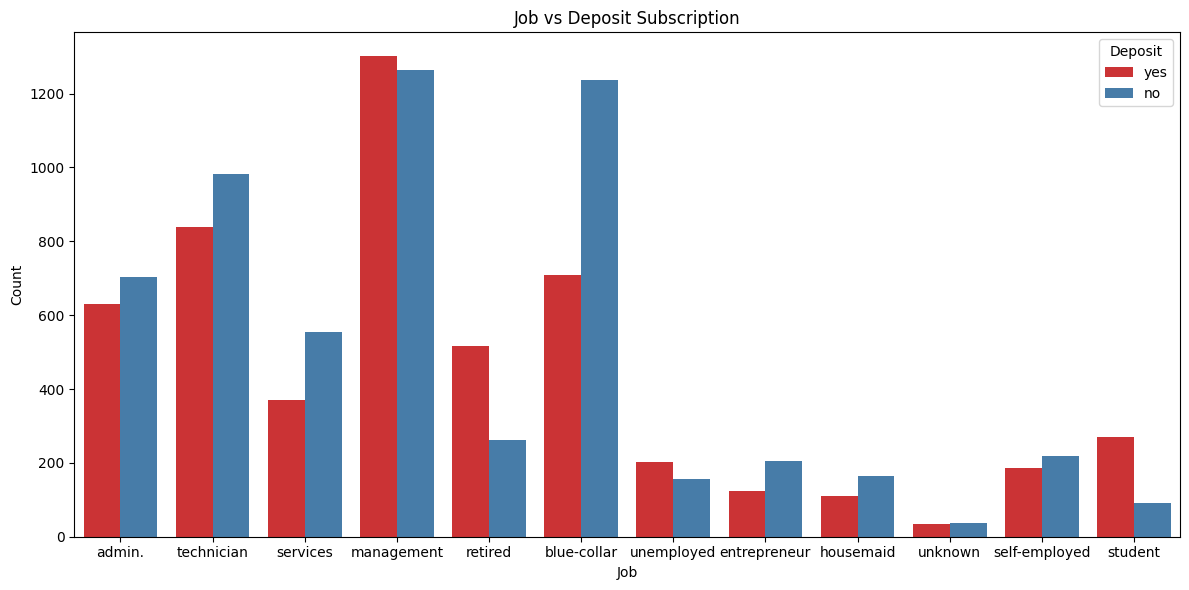

In [ ]:
# Bar plot of Job vs Deposit
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='deposit', data=df, palette='Set1')
plt.title('Job vs Deposit Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Deposit', loc='upper right')
plt.tight_layout()
plt.show()

<ipython-input-59-0ecc4732cdcd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='job', data=df, palette='Set3')


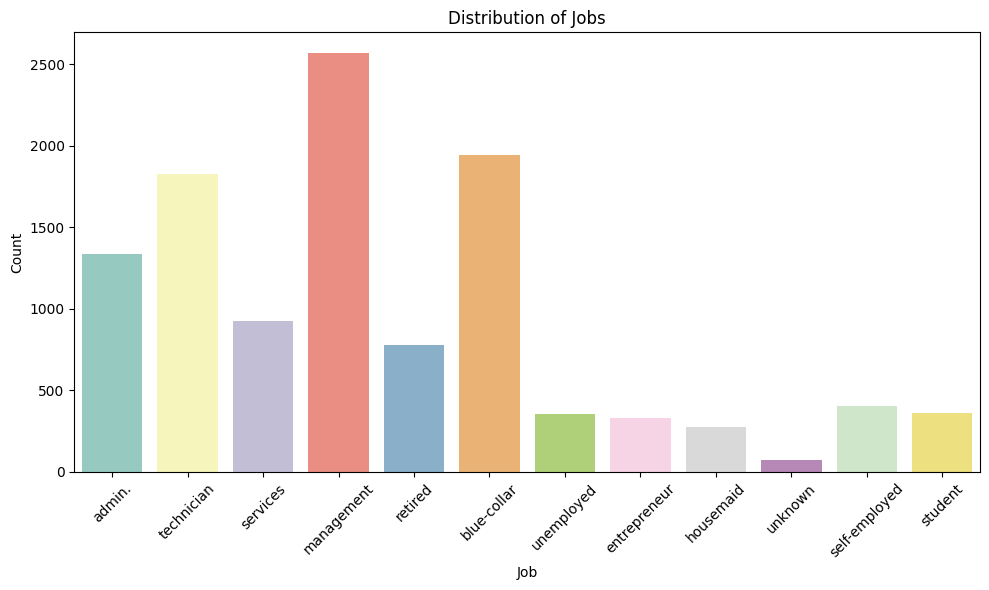

In [ ]:
# Bar plot of Job distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=df, palette='Set3')
plt.title('Distribution of Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

<ipython-input-21-4d7cd33b3dff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='education', y='balance', data=df, palette='viridis')


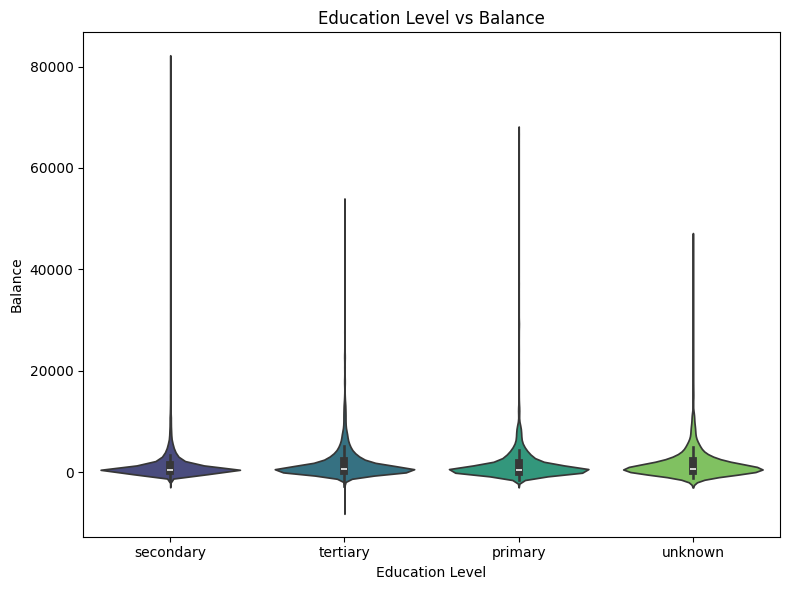

In [ ]:
# Violin plot of Education vs Balance
plt.figure(figsize=(8, 6))
sns.violinplot(x='education', y='balance', data=df, palette='viridis')
plt.title('Education Level vs Balance')
plt.xlabel('Education Level')
plt.ylabel('Balance')
plt.tight_layout()
plt.show()

<ipython-input-22-21cdc5efa5ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='deposit', data=df, palette='Set2')


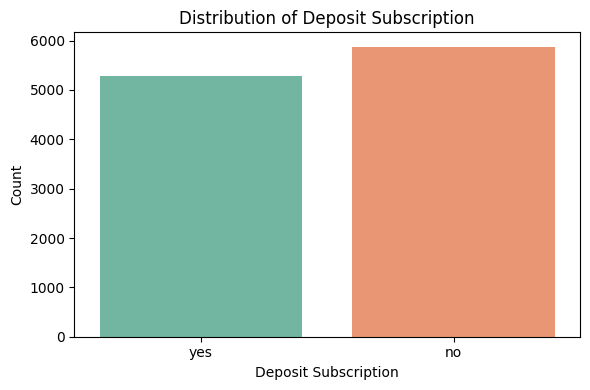

In [ ]:
# Bar plot of Deposit
plt.figure(figsize=(6, 4))
sns.countplot(x='deposit', data=df, palette='Set2')
plt.title('Distribution of Deposit Subscription')
plt.xlabel('Deposit Subscription')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
# Label Encoding for categorical variables
label_encoder = LabelEncoder()

# Assuming 'df' is your DataFrame with categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

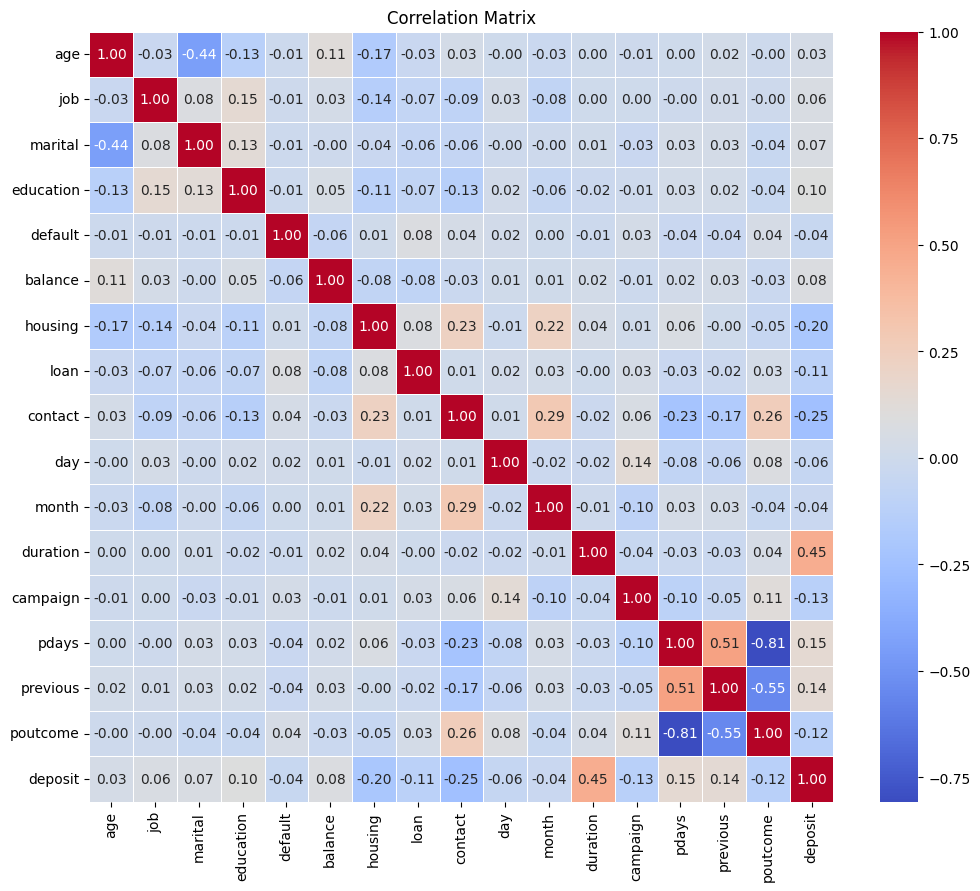

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

we have converted categorical columns to numerical

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [ ]:
from sklearn.metrics import accuracy_score, precision_score # Import precision_score


# **Model Building**

In [ ]:

# Assuming 'deposit' is our target variable
X = df.drop('deposit', axis=1)  # Features
y = df['deposit']               # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)


print(f'Logistic Regression Model - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}')


Logistic Regression Model - Accuracy: 0.7488, Precision: 0.7490


In [ ]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
print("--- Summary of Heart Disease Classification Using Logistic Regression ---")
print("\n--- Detailed Metrics ---")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

--- Summary of Heart Disease Classification Using Logistic Regression ---

--- Detailed Metrics ---
Precision: 0.7490
Recall: 0.7132
Accuracy: 0.7488
Confusion Matrix:
[[911 255]
 [306 761]]


The model **correctly predicted** **911** individuals have subscribed (TP) and **761** individuals not subscribed (TN).

It **incorrectly classified 255** individuals not subscribed as subscribed (FP) and **306** individuals subscribed as not subscribed (FN).

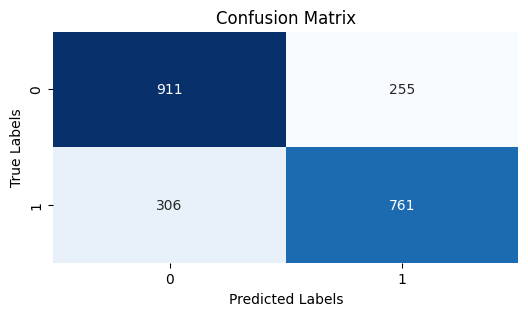

In [ ]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Boosting  my Model with Gradient Boosting**


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()

# Train the model
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier()

**Evaluate the Boosted Model**

In [ ]:
# Predict on test data
y_pred_gb = gb_clf.predict(X_test)

# Calculate metrics
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print metrics
print("--- Boosted Model Metrics ---")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"Accuracy: {accuracy_gb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_gb)

--- Boosted Model Metrics ---
Precision: 0.8005
Recall: 0.8351
Accuracy: 0.8218
Confusion Matrix:
[[944 222]
 [176 891]]


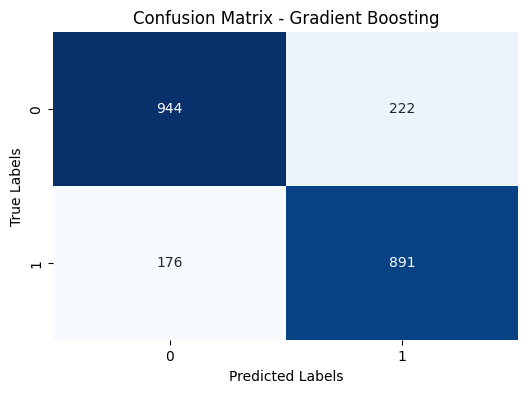

In [ ]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_gb, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=gb_clf.classes_, yticklabels=gb_clf.classes_)
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

These metrics demonstrate improved performance after boosting with Gradient Boosting, indicating higher  accuracy.






